# Practica Clasificación
Diego Delclaux Dapena
Alexandros Pappas

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [122]:
datos = pd.read_csv('pd_data_initial_preprocessing.csv')

## Analisis Descriptivo

In [3]:
# Cantidad de valores nulos por columna
datos.isnull().sum()

id                                     0
url                                    8
zip_code                               8
mths_since_last_record            729784
il_util                           668303
mths_since_recent_bc_dlq          659450
mths_since_rcnt_il                642111
all_util                          635387
inq_fi                            635360
max_bal_bc                        635360
total_cu_tl                       635360
open_acc_6m                       635360
open_act_il                       635360
open_il_12m                       635360
total_bal_il                      635360
open_rv_12m                       635360
open_rv_24m                       635360
open_il_24m                       635360
inq_last_12m                      635360
mths_since_last_major_derog       633271
mths_since_recent_revol_delinq    569050
mths_since_last_delinq            431435
emp_title                          52701
emp_length                         51201
mo_sin_old_il_ac

In [7]:
# Tipos de variables por columna
print(datos.dtypes)

# Tabla con el número de tipos de variables que hay
tabla_tipos = datos.dtypes.value_counts()
print("Tabla de número de variables por tipo")
print(tabla_tipos)

id                                 object
url                                object
zip_code                           object
mths_since_last_record            float64
il_util                           float64
mths_since_recent_bc_dlq          float64
mths_since_rcnt_il                float64
all_util                          float64
inq_fi                            float64
max_bal_bc                        float64
total_cu_tl                       float64
open_acc_6m                       float64
open_act_il                       float64
open_il_12m                       float64
total_bal_il                      float64
open_rv_12m                       float64
open_rv_24m                       float64
open_il_24m                       float64
inq_last_12m                      float64
mths_since_last_major_derog       float64
mths_since_recent_revol_delinq    float64
mths_since_last_delinq            float64
emp_title                          object
emp_length                        

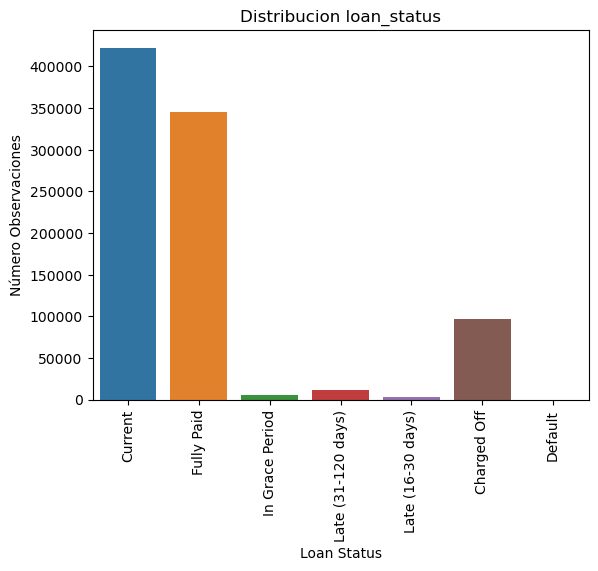

In [15]:
# Distribución de valores en la variable objetivo: 'loan_status'
objetivo = 'loan_status'

sns.countplot(x=objetivo, data=datos)
plt.title('Distribucion loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Número Observaciones')
plt.xticks(rotation=90) # Rotamos las etiquetas del eje x en 90 grados
plt.show()


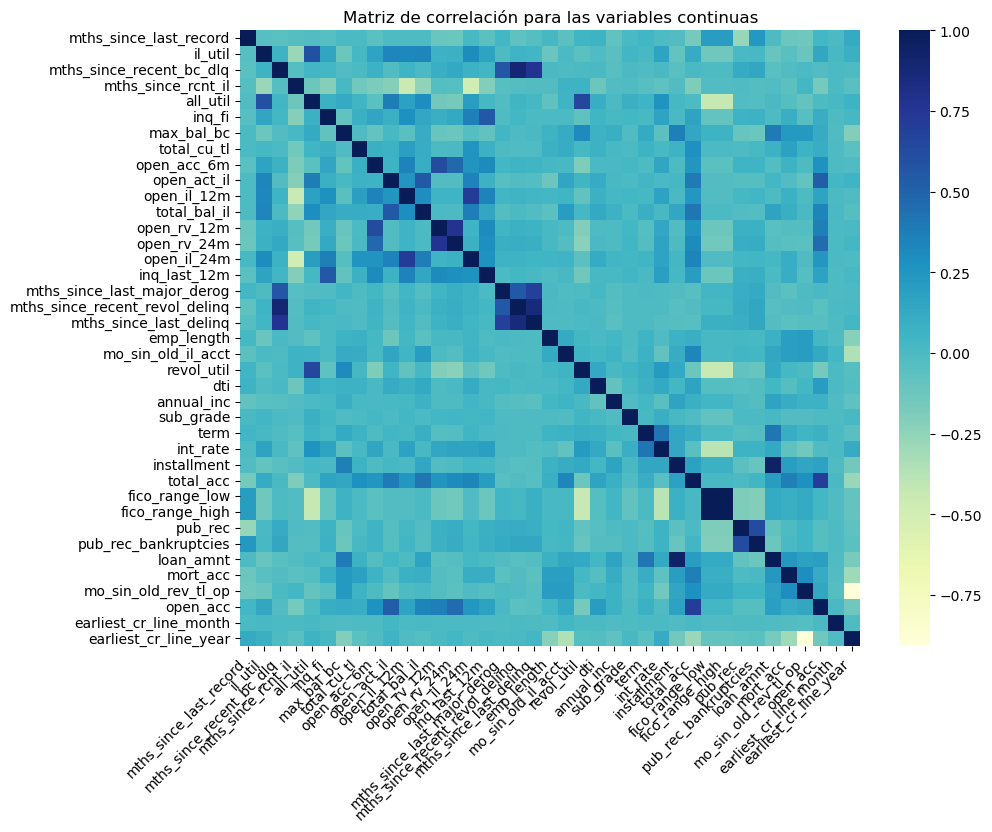

In [21]:
# Matriz de correlación en variables continuas
# Primero identificamos las variables continuas
variables_continuas = []
for col in datos.columns:
    if datos[col].dtype == 'float64':
        variables_continuas.append(col)

# Matriz de correlaciones
correlaciones = datos[variables_continuas].corr()

# Ajustar el tamaño de la figura del gráfico
plt.figure(figsize=(10,8))

# Crear un mapa de calor para visualizar la matriz de correlación
sns.heatmap(correlaciones, annot=False, cmap="YlGnBu")

# Ajustar el tamaño de las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Ajustar el tamaño de las etiquetas del eje y
plt.yticks(rotation=0, ha='right')

# Configurar el título del gráfico
plt.title("Matriz de correlación para las variables continuas")

# Mostrar el gráfico
plt.show()

## Tratamiento de Valores Missing

La imputación por KNN no parece que se ejecute en este caso por lo que voy a hacer la imputación de las variables continuas por la media

In [ ]:
# Voy a hacer la imputación por KNN para las variables continuas y por la moda en variables discretas

# Separar variables continuas y discretas
vars_cont = datos.select_dtypes(include=np.number).columns
vars_disc = datos.select_dtypes(include=['object']).columns

# Imputación por KNN para variables continuas
imputer_cont = KNNImputer(n_neighbors=5, weights='uniform')
datos[vars_cont] = imputer_cont.fit_transform(datos[vars_cont])

# Imputación por moda para variables discretas
datos[vars_disc] = datos[vars_disc].fillna(datos[vars_disc].mode().iloc[0])

# Verificar si aún hay valores faltantes
print(datos.isnull().sum())

In [123]:
# Separar variables continuas y discretas
vars_cont = datos.select_dtypes(include=np.number).columns
vars_disc = datos.select_dtypes(include=['object']).columns

# Imputación por media o mediana para variables continuas
datos[vars_cont] = datos[vars_cont].fillna(datos[vars_cont].median()) 

# Imputación por moda para variables discretas
datos[vars_disc] = datos[vars_disc].fillna(datos[vars_disc].mode().iloc[0])

# Verificar si aún hay valores faltantes
print(datos.isnull().sum())

id                                0
url                               0
zip_code                          0
mths_since_last_record            0
il_util                           0
mths_since_recent_bc_dlq          0
mths_since_rcnt_il                0
all_util                          0
inq_fi                            0
max_bal_bc                        0
total_cu_tl                       0
open_acc_6m                       0
open_act_il                       0
open_il_12m                       0
total_bal_il                      0
open_rv_12m                       0
open_rv_24m                       0
open_il_24m                       0
inq_last_12m                      0
mths_since_last_major_derog       0
mths_since_recent_revol_delinq    0
mths_since_last_delinq            0
emp_title                         0
emp_length                        0
mo_sin_old_il_acct                0
revol_util                        0
dti                               0
verification_status         

## Transformación de variables continuas y categóricas

Variables Categóricas

In [124]:
# verification_status
datos['verification_status'] = datos['verification_status'].replace({'verified': 1, 'not verified': 0})

# home_ownership
# Create a new binary column
datos['home_ownership_binary'] = datos['home_ownership'].apply(lambda x: 1 if x in ['OWN', 'MORTGAGE'] else 0)

# grade
# Define a dictionary to map the grades to numerical values
grade_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
# Apply the mapping to the "grade" column to create a new numerical column
datos['grade_numeric'] = datos['grade'].map(grade_map)

# purpose
# Apply one-hot encoding to the "purpose" column to create new binary columns
purpose_dummies = pd.get_dummies(datos['purpose'], prefix='purpose')
# Add the new binary columns to the original DataFrame
datos = pd.concat([datos, purpose_dummies], axis=1)

# addr_state
# Apply one-hot encoding to the "addr_state" column to create new binary columns
addr_state_dummies = pd.get_dummies(datos['addr_state'], prefix='state')
# Add the new binary columns to the original DataFrame
datos = pd.concat([datos, addr_state_dummies], axis=1)

# application_type
# Define a dictionary to map the application type to binary values
application_type_map = {'Individual': 1, 'Joint App': 0}
# Apply the mapping to the "application_type" column to create a new binary column
datos['application_binary'] = datos['application_type'].map(application_type_map)

# Drop the original categorical columns
datos.drop(['id', 'url', 'zip_code', 'emp_title', 'addr_state', 'initial_list_status', 'verification_status', 'home_ownership', 'grade', 'purpose', 'addr_state', 'application_type'], axis=1, inplace=True)

## Entrenamiento y Test

In [125]:
# Create a new column called 'default'
datos['default'] = datos['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default'] else 0)

# Drop the 'loan_status' column
datos.drop('loan_status', axis=1, inplace=True)

In [126]:
X = datos.drop('default', axis=1)  # seleccionamos todas las columnas excepto la variable objetivo
y = datos['default']  # seleccionamos la columna de la variable objetivo

# particionamos los datos en subconjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


## Logistic Regression

In [127]:
# Realizar transformación
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Entrenar el modelo
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)


# Mostrar resultados de entrenamiento
from sklearn.metrics import accuracy_score

y_train_pred = lr_model.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred)
print('Training accuracy:', train_acc)


# Evaluación del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve, auc

y_test_pred = lr_model.predict(X_test_scaled)
y_test_pred_prob = lr_model.predict_proba(X_test_scaled)[:, 1]
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

print('Test accuracy:', test_acc)
print('Test precision:', test_prec)
print('Test recall:', test_rec)
print('Test confusion matrix:', test_cm)
print('Test F-score:', test_f1)
print('ROC curve:', roc_auc)

Training accuracy: 0.8898708142159253
Test accuracy: 0.8896694868646079
Test precision: 0.4014336917562724
Test recall: 0.011536876802637
Test confusion matrix: [[235841    501]
 [ 28788    336]]
Test F-score: 0.02242915790527686
ROC curve: 0.7622637682569073


## K-NN

In [ ]:
# Realizar transformación
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Mostrar resultados de entrenamiento
from sklearn.metrics import accuracy_score

y_train_pred = knn_model.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred)
print('Training accuracy:', train_acc)

# Evaluación del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve, auc

y_test_pred = knn_model.predict(X_test_scaled)
y_test_pred_prob = knn_model.predict_proba(X_test_scaled)[:, 1]
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred, average='macro')
test_rec = recall_score(y_test, y_test_pred, average='macro')
test_cm = confusion_matrix(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

print('Test accuracy:', test_acc)
print('Test precision:', test_prec)
print('Test recall:', test_rec)
print('Test confusion matrix:', test_cm)
print('Test F-score:', test_f1)
print('ROC curve:', roc_auc)

## Arbol de Decisión Simple

In [134]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar el modelo
dt_model = DecisionTreeClassifier(max_depth=1)

# Entrenar el modelo
dt_model.fit(X_train_scaled, y_train)

# Calcular la precisión de entrenamiento
y_train_pred = dt_model.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred)
print('Training accuracy:', train_acc)

# Calcular las métricas de evaluación
y_test_pred = dt_model.predict(X_test_scaled)
y_test_pred_prob = dt_model.predict_proba(X_test_scaled)[:, 1]
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred, average='macro')
test_rec = recall_score(y_test, y_test_pred, average='macro')
test_cm = confusion_matrix(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

# Imprimir las métricas de evaluación
print('Test accuracy:', test_acc)
print('Test precision:', test_prec)
print('Test recall:', test_rec)
print('Test confusion matrix:', test_cm)
print('Test F-score:', test_f1)
print('ROC curve:', roc_auc)

Training accuracy: 0.8902889486582566
Test accuracy: 0.8902910353868292
Test precision: 0.4451455176934146
Test recall: 0.5
Test confusion matrix: [[236342      0]
 [ 29124      0]]
Test F-score: 0.4709809329464656
ROC curve: 0.6238214954911869


## Bagging Classifier

In [137]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve, auc

# Transformación de datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo
base_model = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=10)
bagging_model.fit(X_train_scaled, y_train)

# Evaluación del modelo
y_train_pred = bagging_model.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred)
print('Training accuracy:', train_acc)

y_test_pred = bagging_model.predict(X_test_scaled)
y_test_pred_prob = bagging_model.predict_proba(X_test_scaled)[:, 1]
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred, average='macro')
test_rec = recall_score(y_test, y_test_pred, average='macro')
test_cm = confusion_matrix(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

print('Test accuracy:', test_acc)
print('Test precision:', test_prec)
print('Test recall:', test_rec)
print('Test confusion matrix:', test_cm)
print('Test F-score:', test_f1)
print('ROC curve:', roc_auc)

Training accuracy: 0.9844337749306608
Test accuracy: 0.8847423022157264
Test precision: 0.5950842706413906
Test recall: 0.5131403378182582
Test confusion matrix: [[233789   2553]
 [ 28044   1080]]
Test F-score: 0.5022609640307555
ROC curve: 0.6947509661957254


## Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve, auc

# Realizar transformación
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Mostrar resultados de entrenamiento
y_train_pred = rf_model.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred)
print('Training accuracy:', train_acc)

# Evaluación del modelo
y_test_pred = rf_model.predict(X_test_scaled)
y_test_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred, average='macro')
test_rec = recall_score(y_test, y_test_pred, average='macro')
test_cm = confusion_matrix(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

print('Test accuracy:', test_acc)
print('Test precision:', test_prec)
print('Test recall:', test_rec)
print('Test confusion matrix:', test_cm)
print('Test F-score:', test_f1)
print('ROC curve:', roc_auc)

Training accuracy: 0.9999693260447711
Test accuracy: 0.8902910353868292
Test precision: 0.6953559846142243
Test recall: 0.5021524922219273
Test confusion matrix: [[236199    143]
 [ 28981    143]]
Test F-score: 0.4758266761513485
ROC curve: 0.7604001551099799


## Gradient Boost

In [138]:
# Importing the model
from sklearn.ensemble import GradientBoostingClassifier

# Creating an instance of the model
gbc_model = GradientBoostingClassifier()

# Fitting the model to the training data
gbc_model.fit(X_train_scaled, y_train)

# Mostrar resultados de entrenamiento
y_train_pred = gbc_model.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred)
print('Training accuracy:', train_acc)

# Evaluating the model on the test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve, auc

y_test_pred = gbc_model.predict(X_test_scaled)
y_test_pred_prob = gbc_model.predict_proba(X_test_scaled)[:, 1]

test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred, average='macro')
test_rec = recall_score(y_test, y_test_pred, average='macro')
test_cm = confusion_matrix(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

print('Test accuracy:', test_acc)
print('Test precision:', test_prec)
print('Test recall:', test_rec)
print('Test confusion matrix:', test_cm)
print('Test F-score:', test_f1)
print('ROC curve:', roc_auc)

Training accuracy: 0.8902986351704342
Test accuracy: 0.890279734504607
Test precision: 0.5451463680163942
Test recall: 0.5000087056583439
Test confusion matrix: [[236338      4]
 [ 29123      1]]
Test F-score: 0.47101198462668514
ROC curve: 0.7718814422678053


## 6.-  ¿Cuál de todas las métricas crees que es la más conveniente?. Ordena todos los métodos de mejor a peor según dichas métricas. 

El modelo de Random Forest es el mejor en términos de precisión en el conjunto de prueba, con una precisión del 69,54%.

Sin embargo, también se debe tener en cuenta que los modelos de Gradient Boosting y Bagging Classifier tienen precisión comparativamente alta y mejor equilibrio entre precisión y recall.

Mi orden es:
1. Gradient Boost
2. Random Forest
3. Bagging Classifier
4. KNN
5. Logistic Regression
6. Arbol Simple

## Importancia de las variables

In [ ]:
# Entrenar el modelo
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

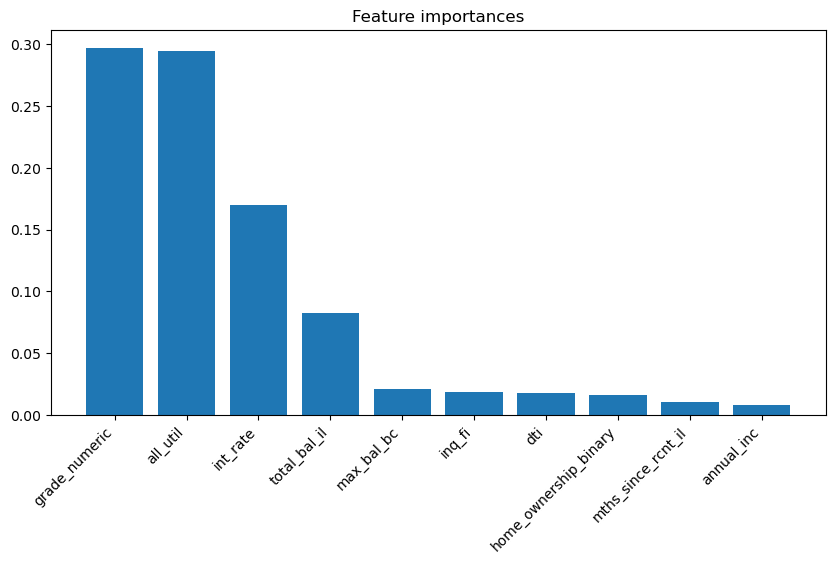

In [143]:
importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1][:10] # slice to show only top 10

plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [X.columns[i] for i in indices], rotation=45, ha="right")
plt.show()